# Multiple Logistic Regression

In [3]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Specific Libraries
import skimpy as sk
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [7]:
# Load file
df = pd.read_csv("placement.csv")
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [13]:
# remove the unnamed column as it has no use in data frame
df.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [25]:
# Defining dependedn and independent vairables i.e y and x

x = df.iloc[:,:2]
y=df.iloc[:,2:]

In [23]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


### Standardization of the Data 

In [31]:
scaler = StandardScaler()

In [34]:
X = scaler.fit_transform(x)

In [38]:
X

array([[ 0.71095807, -0.01459341],
       [-0.0799718 , -0.44233119],
       [-0.60725838, -0.0649155 ],
       [ 1.23824465,  0.21185601],
       [-0.16785289,  0.46346647],
       [ 0.97460136, -1.90167186],
       [-0.25573399,  0.48862751],
       [-0.87090167, -1.52425617],
       [ 0.0957904 ,  0.81572111],
       [-0.78302057, -1.44877303],
       [ 0.0079093 , -1.977155  ],
       [ 0.79883917,  0.36282228],
       [-0.51937728,  0.38798333],
       [ 0.35943369, -0.19072073],
       [ 0.0957904 , -0.51781433],
       [-0.78302057,  1.31894203],
       [-0.69513948,  2.52667224],
       [-2.36488031,  1.49506935],
       [-1.74971264, -0.59329747],
       [-0.69513948,  0.21185601],
       [ 0.53519588, -0.09007654],
       [ 0.97460136,  0.68991588],
       [-0.95878277, -0.09007654],
       [-1.13454496, -0.92039106],
       [-1.13454496, -0.0649155 ],
       [-0.87090167, -0.81974688],
       [ 0.88672027,  1.89764609],
       [ 0.0079093 ,  0.01056764],
       [-0.69513948,

In [41]:
# Train Test Split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.1)

In [43]:
X_train

array([[ 1.15036356, -0.19072073],
       [ 0.79883917,  0.38798333],
       [-0.95878277,  0.79056007],
       [ 0.71095807, -0.01459341],
       [-2.36488031,  1.49506935],
       [ 0.35943369,  0.43830542],
       [ 0.53519588,  0.36282228],
       [-1.04666386,  1.14281471],
       [ 0.88672027,  1.89764609],
       [ 0.0079093 , -1.977155  ],
       [ 1.15036356, -1.85134977],
       [-0.95878277, -0.09007654],
       [ 0.97460136,  0.68991588],
       [ 1.32612575, -1.57457826],
       [ 1.85341233,  1.06733157],
       [ 0.44731478, -2.17844336],
       [ 0.79883917, -0.69394165],
       [-0.69513948, -0.341687  ],
       [ 1.32612575,  0.8660432 ],
       [ 1.15036356,  0.33766124],
       [-1.04666386, -0.29136491],
       [-0.78302057, -1.44877303],
       [ 0.53519588, -0.09007654],
       [-0.51937728, -0.24104282],
       [-0.87090167, -1.52425617],
       [-1.04666386,  0.99184843],
       [-0.69513948,  2.52667224],
       [-2.18911812,  2.75312165],
       [ 0.44731478,

In [45]:
X_test

array([[-1.39818825, -2.05263813],
       [-0.78302057,  0.11121182],
       [-0.69513948,  0.94152634],
       [-0.25573399,  0.21185601],
       [ 0.27155259, -0.51781433],
       [ 1.41400685,  0.11121182],
       [ 0.71095807, -0.84490793],
       [-0.25573399,  0.48862751],
       [-1.74971264, -0.59329747],
       [-0.78302057,  1.31894203]])

In [47]:
# Calling Logitic Regression model
lr = LogisticRegression()

In [51]:
# Model training
lr.fit(X_train,y_train)

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [55]:
y_pred = lr.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred)

0.9

In [62]:
# evaluate the model
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  0.9
Recall Score:  0.75
Precision Score:  1.0
F1 Score:  0.8571428571428571
Confusion Matrix: 
 [[6 0]
 [1 3]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.75      0.86         4

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



<Axes: >

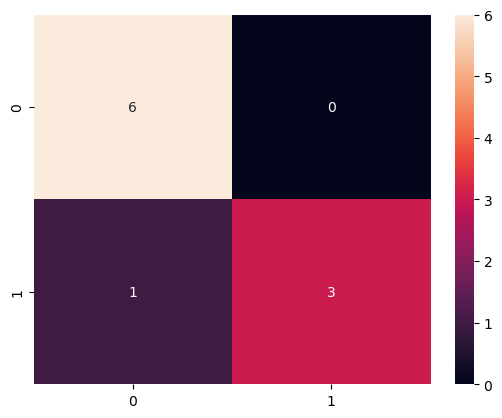

In [66]:
sns.heatmap(confusion_matrix(y_test, y_pred) , annot=True)